# Graph Learning
## Lab 3: Clustering

In this lab, you will learn to cluster a graph by Louvain and interpret the results.

<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
<bold>Done in pair:</bold>
<br>
Rafaela de Carvalho Machado Pinheiro
<br>
Bárbara Barsi Duarte Batista da Silva
</div>

## Import

In [109]:
from IPython.display import SVG

In [110]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [111]:
!pip install scikit-network

In [112]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.ranking import PageRank
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import visualize_graph
from sknetwork.utils import get_degrees, get_membership, get_weights

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [113]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [114]:
dataset_gd = grid(9, 9, True)
adjacency_gd = dataset_gd.adjacency
position_gd = dataset_gd.position

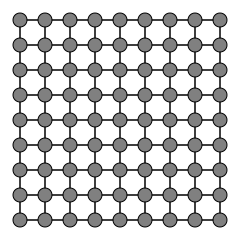

In [115]:
image = visualize_graph(adjacency_gd, position_gd, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and return the corresponding modularity.
* Try to shuffle the nodes and observe the results.
* Find a better clustering than Louvain in terms of modularity. Comment your results.

In [116]:
louvain = Louvain()

In [117]:
labels = louvain.fit_predict(adjacency_gd)

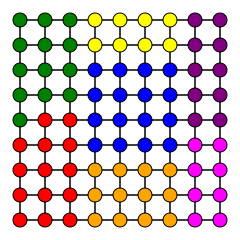

In [118]:
image = visualize_graph(adjacency_gd, position_gd, labels=labels, width=200, height=200)
SVG(image)

In [119]:
get_modularity(adjacency_gd, labels)

np.float64(0.6220341435185185)

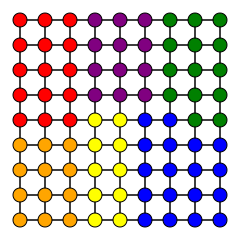

In [120]:
size = adjacency_gd.shape[0]
index = np.arange(size)
np.random.shuffle(index)
adjacency_shuffle = adjacency_gd[index][:, index]
labels_shuffled = louvain.fit_predict(adjacency_shuffle)
image = visualize_graph(adjacency_shuffle, position_gd[index], labels=labels_shuffled, width=200, height=200)
SVG(image)

In [121]:
get_modularity(adjacency_shuffle, labels_shuffled)

np.float64(0.6337046682098766)

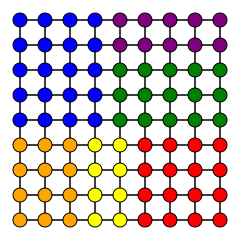

In [122]:
size = adjacency_gd.shape[0]
index_permute = np.random.permutation(size)
# np.random.shuffle(index)
adjacency_permute = adjacency_gd[index_permute][:, index_permute]
labels_permute = louvain.fit_predict(adjacency_permute)
image_permute = visualize_graph(adjacency_permute, position_gd[index_permute], labels=labels_permute, width=200, height=200)
SVG(image_permute)

In [123]:
get_modularity(adjacency_permute, labels_permute)

np.float64(0.6304976851851851)

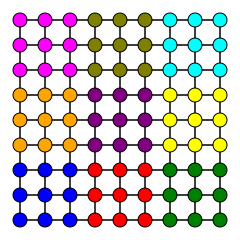

In [124]:
size = adjacency_gd.shape[0]
labels_grid = np.array([((i % 9) // 3) * 3 + (i // 9) // 3 for i in range(size)])
image = visualize_graph(adjacency_gd, position_gd, labels=labels_grid, width=200, height=200)
SVG(image)

In [125]:
get_modularity(adjacency_gd, labels_grid)

np.float64(0.638454861111111)

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [126]:
dataset_kc = karate_club(metadata=True)

In [127]:
adjacency_kc = dataset_kc.adjacency
position_kc = dataset_kc.position
labels_true_kc = dataset_kc.labels

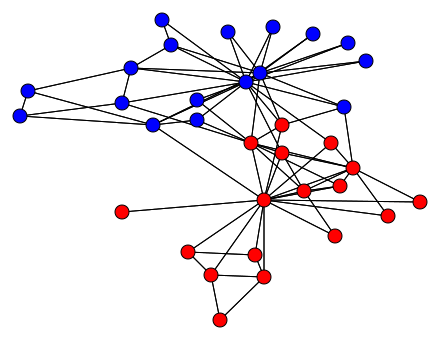

In [128]:
image = visualize_graph(adjacency_kc, position_kc, labels=labels_true_kc)
SVG(image)

In [129]:
# Ground-truth clusters modularity
get_modularity(adjacency_kc, labels_true_kc)

np.float64(0.3582347140039448)

## To do

* Cluster the graph by Louvain and display the labels. Give the modularity.
* Compare with the modularity obtained with the ground-truth labels and comment the results.
* Display the aggregate graph after clustering by Louvain (check this [tutorial](https://scikit-network.readthedocs.io/en/latest/tutorials/clustering/louvain.html)).
* Adapt the resolution to get 2 clusters. Compare with the ground-truth and comment the results.

In [130]:
louvain = Louvain()

In [131]:
labels_kc = louvain.fit_predict(adjacency_kc)

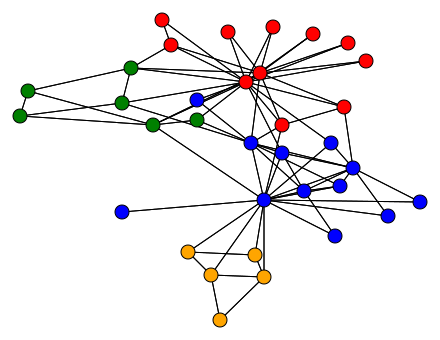

In [132]:
image = visualize_graph(adjacency_kc, position_kc, labels=labels_kc)
SVG(image)

In [133]:
get_modularity(adjacency_kc, labels_kc)

np.float64(0.4188034188034188)

<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
  <strong>Answer</strong>
  <br>
  The modularity obtained with the Louvain algorithm is higher than the one computed with the ground-truth labels, which means that the Louvain algorithm obtains a partitioning which maximizes intra-cluster links more than the actual club split. This shows how cluster structure from data can reveal structures in communities which are not necessarily aligned by pre-specified classes.
</div>

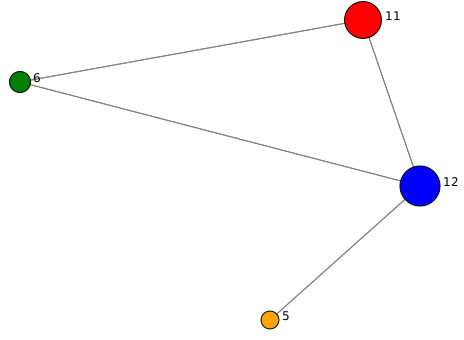

In [134]:
adjacency_aggregate_kc = louvain.aggregate_
average_kc = normalize(get_membership(labels_kc).T)
position_aggregate_kc = average_kc.dot(position_kc)
labels_unique_kc, counts_kc = np.unique(labels_kc, return_counts=True)

image = visualize_graph(adjacency_aggregate_kc, position_aggregate_kc, counts_kc, labels=labels_unique_kc, display_node_weight=True, node_weights=counts_kc)
SVG(image)

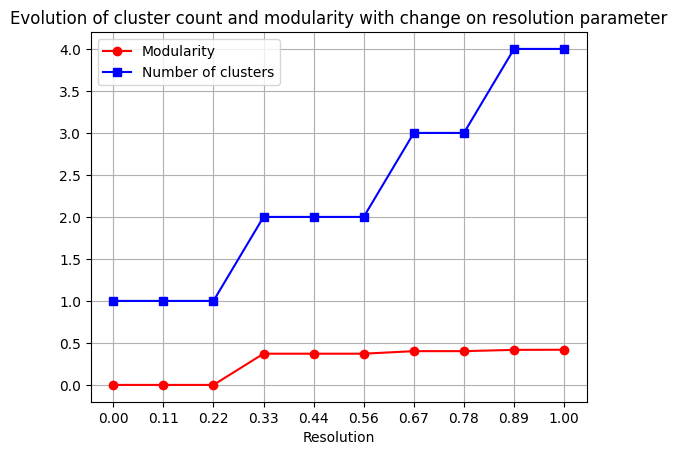

In [135]:
clusters_count = []
modularity_evol = []
resol_array = []

for i in np.linspace(0, 100, 10):
  louvain_2 = Louvain(resolution = i/100)
  labels_kc_2 = louvain_2.fit_predict(adjacency_kc)
  _, counts_kc = np.unique(labels_kc_2, return_counts=True)

  resol_array.append(f"{i / 100:.2f}")
  clusters_count.append(len(counts_kc))
  modularity_evol.append(get_modularity(adjacency_kc, labels_kc_2))

plt.title('Evolution of cluster count and modularity with change on resolution parameter')
plt.plot(resol_array, modularity_evol, label='Modularity', color='red', marker='o')
plt.plot(resol_array, clusters_count, label='Number of clusters', color='blue', marker='s')

plt.xticks(range(len(resol_array)), resol_array)

plt.xlabel('Resolution')
plt.legend()
plt.grid(True)
plt.show()

0.3717948717948718


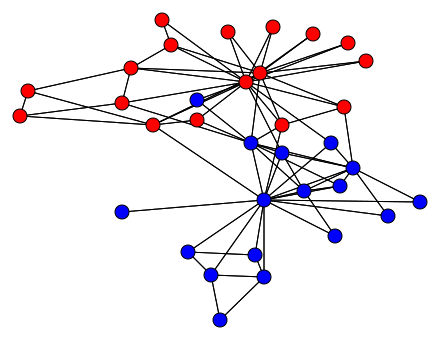

In [136]:
louvain_2 = Louvain(resolution = 0.3)
labels_kc_2 = louvain_2.fit_predict(adjacency_kc)
_, counts_kc = np.unique(labels_kc_2, return_counts=True)

print(get_modularity(adjacency_kc, labels_kc_2))

image = visualize_graph(adjacency_kc, position_kc, labels=labels_kc_2)
SVG(image)

<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
  <strong>Answer</strong>
  <br>
  When it is forced to output 2 clusters (by manipulating the resolution parameter), the  result is similar to the ground-truth partitioning of the karate club, but not exactly the same. Although it preservers the overall separation, nodes are labeled differently, indicative of the fact that the algorithm is aiming to maximize modularity and not necessarily to exactly reproduce human-provided labels.
</div>

## Openflights


In [137]:
dataset_of = openflights

In [138]:
adjacency_of = dataset_of.adjacency
position_of = dataset_of.position
names_of = dataset_of.names

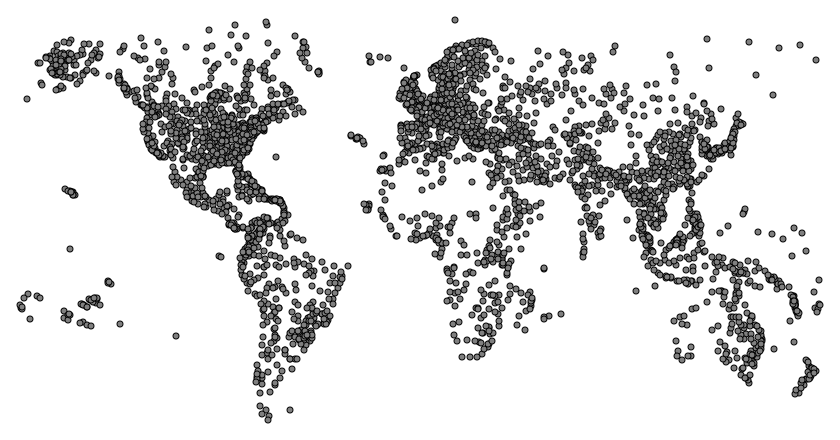

In [139]:
image = visualize_graph(adjacency_of, position_of, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? How to interpret this result?
* List the top airport of each cluster in number of flights.
* Display the aggregate graph. Name each cluster by its top airport and display the total traffic of each cluster by the node size.
* Display the same graph restricted to clusters with at least 100 nodes.
* What is the cluster with the highest traffic?

In [140]:
# louvain clusters
louvain = Louvain(1)
labels_of = louvain.fit_predict(adjacency_of)

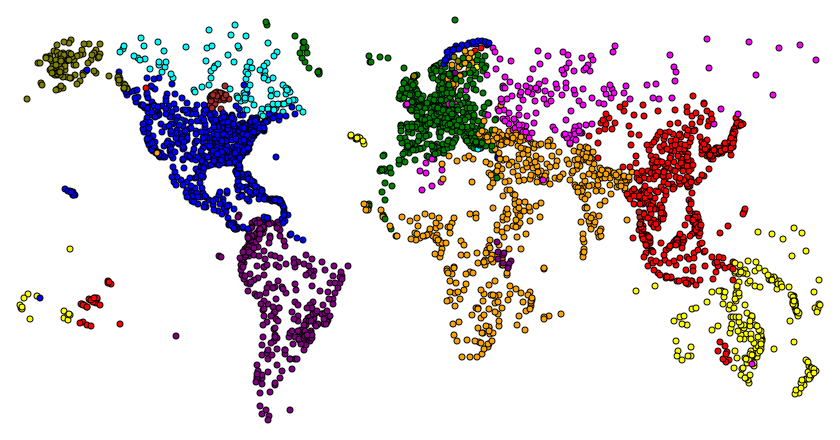

In [141]:
image = visualize_graph(adjacency_of, position_of, labels=labels_of, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

In [142]:
# number of clusters
n_clusters = len(set(labels_of))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 30


In [143]:
# modularity
get_modularity(adjacency_of, labels_of, return_all=True)

(np.float64(0.655010075624915),
 np.float64(0.8706267998284419),
 np.float64(0.21561672420352695))

In [144]:
# simpson index
def simpson_index(labels):
  res = 0
  volume = adjacency_of.sum()
  for k in range(n_clusters):
    vk = adjacency_of[labels == k].sum()
    res += (vk / volume) ** 2
  return res

simpson = simpson_index(labels_of)
print(f"Simpson Index: {simpson:.4f}")

Simpson Index: 0.2156


<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
  <strong>Answer</strong>
  <br>
  If the clusters were random, we would get a Simpson index of approximately of 0.0333 (1/30), so that means our clustering is not random. It has moderate concentration and a few large clusters, probably due to flight hubs.
  <br>
</div>

In [145]:
# top airport of each cluster
weights_of = get_weights(adjacency_of)

labels_unique, counts = np.unique(labels_of, return_counts=True)

top_airports = []
for cluster_id in labels_unique:
    cluster_idx = (labels_of == cluster_id)
    # find airport with max weight in cluster
    top_idx = np.argmax(np.where(cluster_idx, weights_of, -1))
    top_airport = names_of[top_idx]
    top_degree = weights_of[top_idx]
    # top_airports.append((cluster_id, top_airport, top_degree))
    top_airports.append(top_airport)
    print(f"{cluster_id}: {top_airport} (Flights: {top_degree})")

0: Hartsfield Jackson Atlanta International Airport (Flights: 382.0)
1: Beijing Capital International Airport (Flights: 332.0)
2: Amsterdam Airport Schiphol (Flights: 492.0)
3: Atatürk International Airport (Flights: 354.0)
4: Guarulhos - Governador André Franco Montoro International Airport (Flights: 180.0)
5: Sydney Kingsford Smith International Airport (Flights: 139.0)
6: Domodedovo International Airport (Flights: 277.0)
7: Ted Stevens Anchorage International Airport (Flights: 52.0)
8: Quebec Jean Lesage International Airport (Flights: 45.0)
9: Sioux Lookout Airport (Flights: 31.0)
10: Trondheim Airport Værnes (Flights: 63.0)
11: Faa'a International Airport (Flights: 38.0)
12: Godthaab / Nuuk Airport (Flights: 35.0)
13: Stockholm-Bromma Airport (Flights: 32.0)
14: Nairobi Wilson Airport (Flights: 13.0)
15: João Paulo II Airport (Flights: 30.0)
16: Touat Cheikh Sidi Mohamed Belkebir Airport (Flights: 11.0)
17: Kirkwall Airport (Flights: 13.0)
18: Sitia Airport (Flights: 10.0)
19: Mye

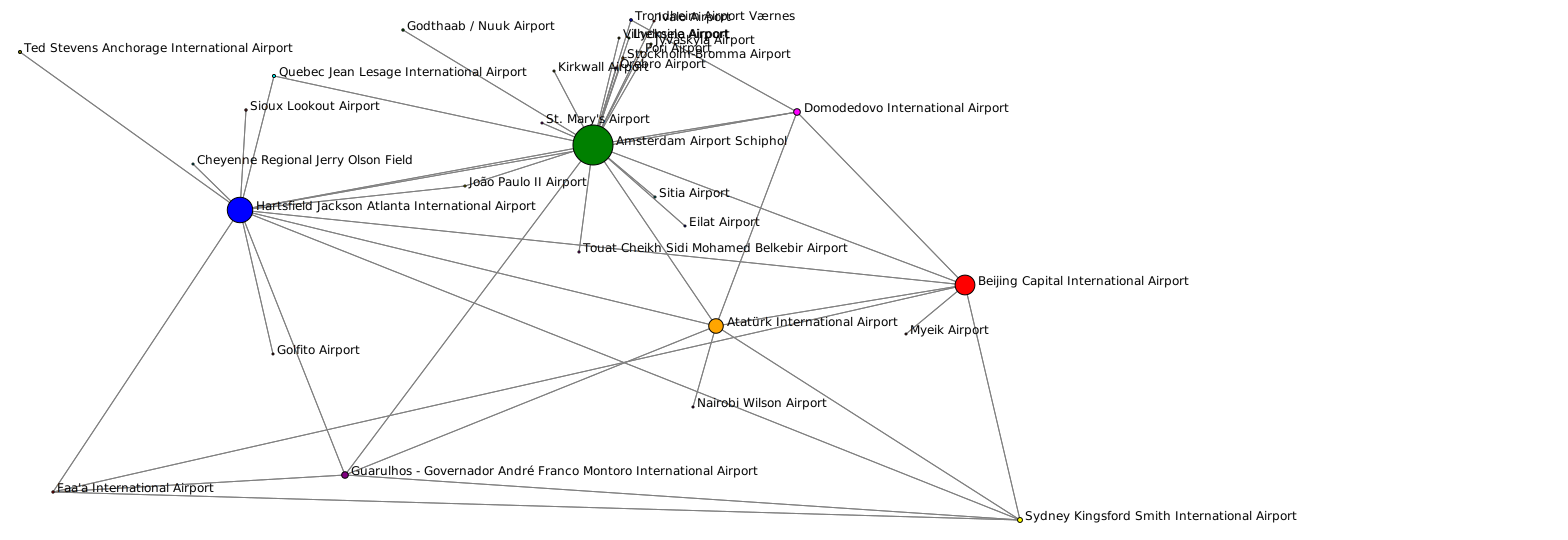

In [146]:
# aggregate graph
adjacency_agg = louvain.aggregate_
average = normalize(get_membership(labels_of).T)
position_agg = average.dot(position_of)

image = visualize_graph(adjacency_agg, position_agg, names=top_airports, width=1000, height=500, display_node_weight=True, edge_width_max=300, labels=labels_unique)
SVG(image)

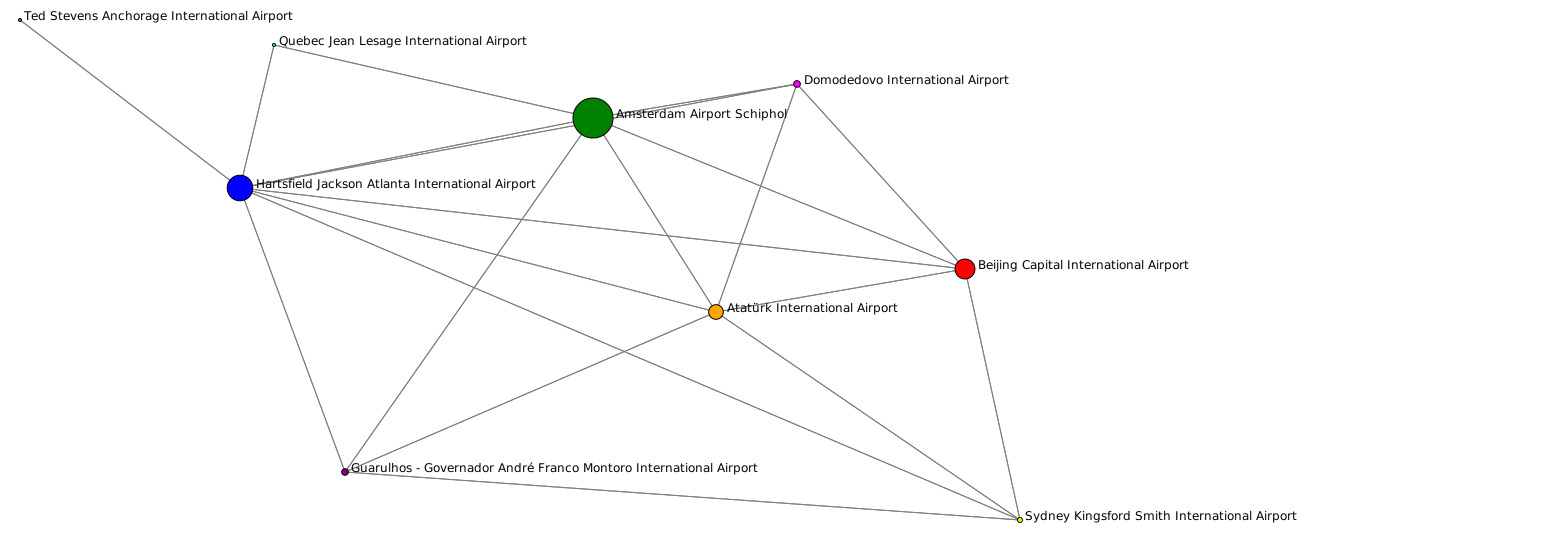

In [147]:
# aggregate graph - at least 100 nodes
# get all clusters with a minimum of 100 nodes
cluster_idx = counts >= 100

adjacency_agg_large = adjacency_agg[cluster_idx][:, cluster_idx]
position_agg_large = position_agg[cluster_idx]

image = visualize_graph(adjacency_agg_large, position_agg_large, names=np.array(top_airports)[cluster_idx], width=1000, height=500, display_node_weight=True, edge_width_max=300, labels=labels_unique[cluster_idx])
SVG(image)

<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
  <strong>Answer</strong>
  <br>
  By looking at the two aggregate graphs, we can see the cluster with the most traffic is the one represented by Amsterdam Airport.
  <br>
</div>

## 2. Directed graphs

## Wikipedia Vitals

In [148]:
graph_wv = wikivitals

In [149]:
adjacency_wv = graph_wv.adjacency
names_wv = graph_wv.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank.
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* Display the same graph restricted to clusters with at least 100 nodes.
* Among these clusters, which is the strongest? Interpret the result.
* Repeat the same experiments at resolution 2.

<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
  <strong>Coding part for resolution = 1</strong>
</div>

In [150]:
# Louvain clusters (resolution = 1)

louvain_wv_1 = Louvain(resolution = 1)
labels_wv_1 = louvain_wv_1.fit_predict(adjacency_wv)
_, counts_wv_1 = np.unique(labels_wv_1, return_counts=True)

print(get_modularity(adjacency_wv, labels_wv_1))

0.4688587606559943


In [151]:
pagerank = PageRank()

labels_wv_1 = np.array(labels_wv_1)
top_list = [[] for _ in range(np.max(labels_wv_1)+1)]

for label in np.unique(labels_wv_1):

    selected_pages_idx = np.where(labels_wv_1 == label)[0]
    weights = np.zeros(adjacency_wv.shape[0])
    weights[list(selected_pages_idx)] = 1

    label_scores = pagerank.fit_predict(adjacency_wv, weights=weights)
    ranked_indices_label = np.argsort(-label_scores)
    for p in ranked_indices_label:
        if weights[p] == 1: top_list[label].append(names_wv[p])

print("\nTop 5 articles for each category:\n")
for i, label in enumerate([top[:5] for top in top_list], 1):
    print(f"Label {i}: {', '.join(label)}")
    print()


Top 5 articles for each category:

Label 1: Physics, Hydrogen, Oxygen, Kelvin, Albert Einstein

Label 2: Taxonomy (biology), Animal, Plant, Protein, Species

Label 3: Latin, World War I, Roman Empire, Middle Ages, Greek language

Label 4: Christianity, Aristotle, Catholic Church, Plato, Age of Enlightenment

Label 5: United States, World War II, Geographic coordinate system, United Kingdom, France

Label 6: China, India, Buddhism, Islam, Chinese language

Label 7: The New York Times, New York City, Time (magazine), BBC, The Washington Post

Label 8: Earth, Atlantic Ocean, Europe, Drainage basin, Pacific Ocean

Label 9: Handbag, Hat, Veil, Uniform, Clothing



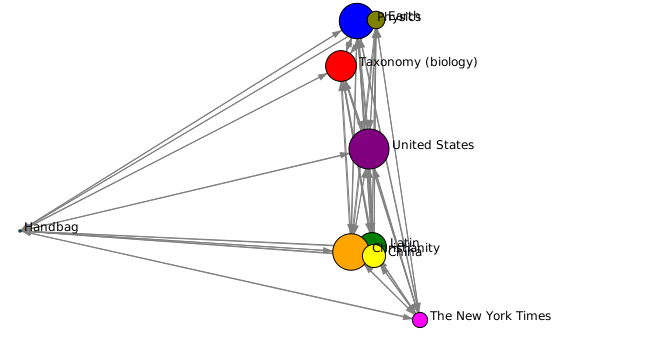

In [152]:
adjacency_aggregate_wv_1 = louvain_wv_1.aggregate_
labels_unique_wv_1, counts_wv_1 = np.unique(labels_wv_1, return_counts=True)
top_pages = [label[0] for label in top_list]

image = visualize_graph(adjacency_aggregate_wv_1, labels=labels_unique_wv_1, names=top_pages, display_node_weight=True)
SVG(image)

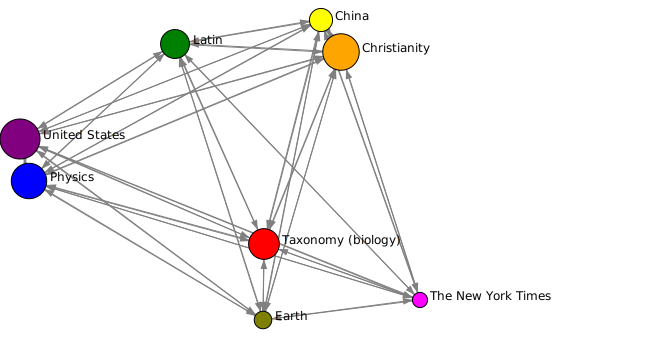

In [153]:
indices = [i for i, c in enumerate(counts_wv_1) if c >= 100]

sub_adjacency_wv_1 = adjacency_aggregate_wv_1[np.ix_(indices, indices)]
sub_labels_unique_wv_1 = [labels_unique_wv_1[i] for i in indices]
sub_top_pages_wv_1 = [top_list[labels_unique_wv_1[i]][0] if top_list[labels_unique_wv_1[i]] else "" for i in indices]

image = visualize_graph(
    sub_adjacency_wv_1,
    labels=sub_labels_unique_wv_1,
    names=sub_top_pages_wv_1,
    display_node_weight=True
)
SVG(image)


In [154]:
strengths_wv_1 = adjacency_aggregate_wv_1.diagonal() / get_degrees(adjacency_aggregate_wv_1)
top_strength = np.argmax(strengths_wv_1)
print(f"Strongest cluster: {top_pages[top_strength]}")

Strongest cluster: Physics


<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
  <strong>Answer:</strong>
  At resolution 1, the strongest cluster is Physics, since it corresponds to a group of highly interlinked pages with highly connected nodes, with an anchor set of generic knowledge topics. This is a highly modular cluster in that its nodes are more internally connected to each other than to the entire network, which indicates a homogenous theme or subject category.

</div>

<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
  <strong>Coding part for resolution = 2</strong>
</div>

In [155]:
# Louvain clusters (resolution = 2)

louvain_wv_2 = Louvain(resolution = 2)
labels_wv_2 = louvain_wv_2.fit_predict(adjacency_wv)
_, counts_wv_2 = np.unique(labels_wv_2, return_counts=True)

print(get_modularity(adjacency_wv, labels_wv_2))

0.4328904492823631


In [156]:
pagerank = PageRank()

labels_wv_2 = np.array(labels_wv_2)
top_list = [[] for _ in range(np.max(labels_wv_2)+1)]

for label in np.unique(labels_wv_2):

    selected_pages_idx = np.where(labels_wv_2 == label)[0]
    weights = np.zeros(adjacency_wv.shape[0])
    weights[list(selected_pages_idx)] = 1

    label_scores = pagerank.fit_predict(adjacency_wv, weights=weights)
    ranked_indices_label = np.argsort(-label_scores)
    for p in ranked_indices_label:
        if weights[p] == 1: top_list[label].append(names_wv[p])

print("\nTop 5 articles for each category:\n")
for i, label in enumerate([top[:5] for top in top_list], 1):
    print(f"Label {i}: {', '.join(label)}")
    print()


Top 5 articles for each category:

Label 1: Taxonomy (biology), Animal, Chordate, Permian, Cambrian

Label 2: The New York Times, BBC, Time (magazine), The Washington Post, Library of Congress

Label 3: Physics, Albert Einstein, Isaac Newton, Kelvin, Electron

Label 4: World Health Organization, Medical diagnosis, Cancer, Central nervous system, Immune system

Label 5: Jewellery, Wood, Industrial Revolution, Axe, Agriculture

Label 6: Real number, Function (mathematics), Complex number, Set (mathematics), Mathematical analysis

Label 7: Aristotle, Plato, Immanuel Kant, David Hume, Age of Enlightenment

Label 8: Christianity, Catholic Church, Buddhism, Islam, Hinduism

Label 9: Ottoman Empire, Roman Empire, Byzantine Empire, Iran, Persian language

Label 10: Paris, London, Modernism, Renaissance, Rome

Label 11: World War II, World War I, Soviet Union, Cold War, United Nations

Label 12: China, Chinese language, Japan, Ming dynasty, Qing dynasty

Label 13: United Kingdom, France, Egypt

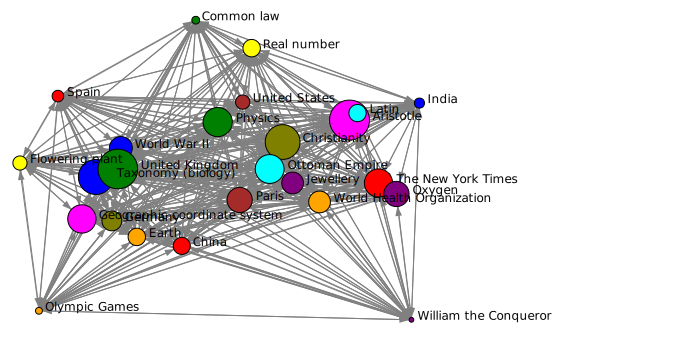

In [157]:
adjacency_aggregate_wv_2 = louvain_wv_2.aggregate_
labels_unique_wv_2, counts_wv_2 = np.unique(labels_wv_2, return_counts=True)
top_pages = [label[0] for label in top_list]

image = visualize_graph(adjacency_aggregate_wv_2, labels=labels_unique_wv_2, names=top_pages, display_node_weight=True)
SVG(image)

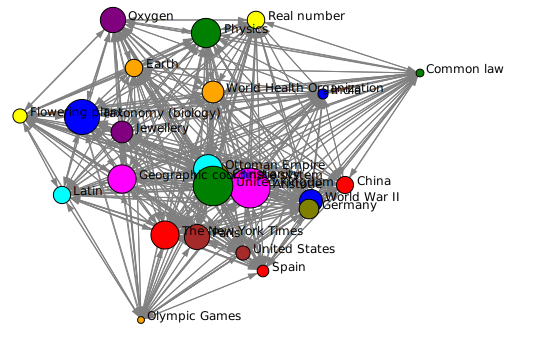

In [158]:
indices = [i for i, c in enumerate(counts_wv_2) if c >= 100]

sub_adjacency_wv_2 = adjacency_aggregate_wv_2[np.ix_(indices, indices)]
sub_labels_unique_wv_2 = [labels_unique_wv_2[i] for i in indices]
sub_top_pages_wv_2 = [top_list[labels_unique_wv_2[i]][0] if top_list[labels_unique_wv_2[i]] else "" for i in indices]

image = visualize_graph(
    sub_adjacency_wv_2,
    labels=sub_labels_unique_wv_2,
    names=sub_top_pages_wv_2,
    display_node_weight=True
)
SVG(image)


In [159]:
strengths_wv_2 = adjacency_aggregate_wv_2.diagonal() / get_degrees(adjacency_aggregate_wv_2)
top_strength = np.argmax(strengths_wv_2)
print(f"Strongest cluster: {top_pages[top_strength]}")

Strongest cluster: Aristotle


<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
  <strong>Answer:</strong>
  With resolution 2, the strongest cluster is the one with Aristotle. In this case, more clusters are formed and the strongest cluster is smaller but denser. The most modular cluster would likely have highly inter-related articles in a small region, which implies how higher resolution detects more fine-grained topic communities.
</div>

## 3. Bipartite graphs

## Cinema

In [160]:
dataset_c = cinema

In [161]:
biadjacency = dataset_c.biadjacency
movies = dataset_c.names_row
actors = dataset_c.names_col

## To do


* Cluster the graph by Louvain (resolution 1).
* List the 10 largest clusters and display the names of the top-3 actors and top-3 movies of these cluster in terms of Personalized PageRank.

In [164]:
# Louvain clusters (resolution = 1)

louvain = Louvain(resolution = 1)
labels = louvain.fit(biadjacency)

In [166]:
cluster_sizes = np.bincount(np.asarray(louvain.labels_row_).flatten())
top_clusters = np.argsort(cluster_sizes)[-10:][::-1]

row_labels = louvain.labels_row_
column_labels = louvain.labels_col_
top_results = [[] for _ in top_clusters]

for cluster in top_clusters:

    movie_weights = (row_labels == cluster).astype(float)
    actor_weights = (column_labels == cluster).astype(float)

    pagerank = PageRank()
    pagerank.fit(biadjacency, weights_row=movie_weights, weights_col=actor_weights, force_bipartite=True)

    movie_indices = np.where(row_labels == cluster)[0]
    actor_indices = np.where(column_labels == cluster)[0]
    movie_scores = pagerank.scores_row_[movie_indices]
    actor_scores = pagerank.scores_col_[actor_indices]

    top_movie_indices = movie_indices[np.argsort(movie_scores)[-3:][::-1]]
    top_actor_indices = actor_indices[np.argsort(actor_scores)[-3:][::-1]]

    top_results[cluster] = {
        'top_movies': movies[top_movie_indices].tolist(),
        'top_actors': actors[top_actor_indices].tolist()
    }


for i, res in enumerate(top_results, 1):
    print(f"Cluster: {i}")
    print(f"Top actors: {res['top_actors']}")
    print(f"Top movies: {res['top_movies']}")
    print()

Cluster: 1
Top actors: ['Eric Roberts', 'Donald Sutherland', 'Harvey Keitel']
Top movies: ['The Walking Dead (TV series)', 'Arrow (TV series)', 'House of Cards (U.S. TV series)']

Cluster: 2
Top actors: ['Harry Carey', 'Blanche Sweet', 'Roy Rogers']
Top movies: ['Paramount on Parade', 'Ziegfeld Follies', 'Mourning Becomes Electra']

Cluster: 3
Top actors: ['Prem Nazir', 'Jagathy Sreekumar', 'Adoor Bhasi']
Top movies: ['Suyamvaram', 'Kerala Cafe', 'Paalayam']

Cluster: 4
Top actors: ['Louis de Funès', 'Isabelle Huppert', 'Marcello Mastroianni']
Top movies: ['Kaamelott', 'Research unit', 'Hero Corp']

Cluster: 5
Top actors: ['Christopher Lee', 'Stewart Rome', 'John Stuart']
Top movies: ['The Devil Rides Out', "What's Up Superdoc!", 'Unforgotten']

Cluster: 6
Top actors: ['Andy Lau', 'Kiyoshi Atsumi', 'Simon Yam']
Top movies: ['Seven Samurai', 'Toei Hero Next', 'Metropolis (2001 film)']

Cluster: 7
Top actors: ['Mithun Chakraborty', 'Dharmendra', 'Jeetendra']
Top movies: ['Darna Mana Hai'